# On Statistical Distributions

In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

A fundamental distinction among kinds of distributions is the distinction between discrete and continuous distributions. A discrete distribution (or variable) takes on countable values, like integers, while a continuous distribution takes on a continuum of values, like real numbers.

## Center, Spread, Shape

Of _any_ distribution it is natural to ask about its center, its spread, and its shape. The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

For a continuous distribution:

mean = $\Large\mu = \int_Xxp(x)dx$, <br/> where $p(x)$ is the probability density function associated with the distribution $X$ (see below).

The 'spread' refers loosely to how far away the more extreme values are from the center, and is measured more precisely by the notion of the standard deviation, which is effectively a measure of the average distance away from the mean.

For a discrete distribution:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$

For a continuous distribution:

std = $\Large\sigma = \sqrt{\int_X(x - \mu)^2p(x)dx}$, <br/> where again $p(x)$ is the probability density function of X.

The 'shape' refers loosely to how the probability of obtaining certain values changes as a function of where we are in the distribution. Are middle or extreme values more probable? Is the distribution symmetric about the middle or not?

## Discrete Distributions

### Binomial

The binomial distribution applies when I have a process that has only two outcomes. Suppose some baseball team has a 70% chance of winning any game that it plays. The binomial distribution can tell me what the probability is that the team win exactly $k$ out of $n$ games ($k < n$).

$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$

Note: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

We can use the scipy.stats module to make quick statistical calculations!

In [10]:
stats.binom

In [11]:
# Suppose I flip a fair coin 300 times. What are the chances that I get exactly 162 heads?

stats.binom.pmf(162, 300, 0.5)

0.017662007325473562

In [12]:
# What is the standard deviation of a binomial distribution of 10 repeated trials,
# where each trial has a probability of success of 45%?

stats.binom.std(10, 0.45)

1.5732132722552274

In [13]:
# For a binomial variable representing 500 repeated trials,
# where each has a probability of success of 90%,
# what interval will contain 50% of my distribution?

stats.binom.interval(0.5, 500, 0.9)

(446.0, 455.0)

In [34]:
n = 500
p = 0.95
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x

array([ 463.,  464.,  465.,  466.,  467.,  468.,  469.,  470.,  471.,
        472.,  473.,  474.,  475.,  476.,  477.,  478.,  479.,  480.,
        481.,  482.,  483.,  484.,  485.])

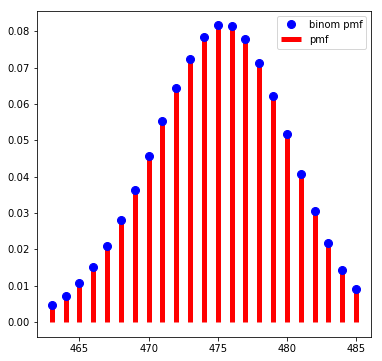

In [51]:
n = 500
p = 0.95
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
y = stats.binom.pmf(x, n, p)
#z= stats.binom.cdf(x, n, p)

ax.plot(x, y, 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, y, 'r', lw=5, label='pmf')
ax.legend(loc='best')
plt.show()

### Geometric

The geometric distribution is for discrete distributions what the exponential distribution is for continuous ones (see below).

Suppose I'm thinking about flipping a fair coin and wondering about how long I'll need to wait before it lands heads. There's a 50-50 chance that I'll have to wait more than one flip. But there is only one chance in four that I'd have to wait more than two flips, and only one chance in eight that I'd have to wait more than three flips.

$\Large f(x) = (1 - p)^{k - 1}p$

In [35]:
stats.geom(0.5, loc=0).mean()

2.0

In [36]:
stats.geom(0.5).interval(0.5)

(1.0, 2.0)

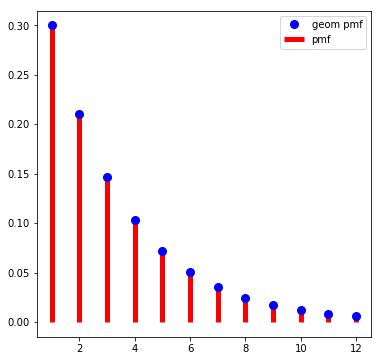

In [55]:
p = 0.3
x = np.arange(stats.geom.ppf(0.01, p),
              stats.geom.ppf(0.99, p))
y = stats.geom.pmf(x, p)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(x, y, 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, y, 'r', linewidth = 5, label='pmf')
ax.legend(loc='best')
plt.show()

### Uniform

The uniform distribution applies when all possible values of the variable are _equally probable_. If I'm rolling a fair die, then the six possible outcomes are all equally probable. That is, the chance that I roll a 1 is 1 in 6, as is the chance that I roll a 2 etc.

$\Large f(x) = \frac{1}{b - a}$

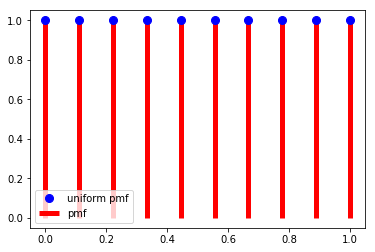

In [47]:
x = np.linspace(stats.uniform.ppf(0),
               stats.uniform.ppf(1), 10)
y = stats.uniform.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y,'bo', ms=8, label = 'uniform pmf')
ax.vlines(x, 0, y, 'r', lw=5, label='pmf')
ax.legend(loc='best')
plt.show();

## Continuous Distributions

### Probability Density Function and Cumulative Distribution Function

The $\bf{probability\ density\ function\ (pdf)}$ plays the same role for continuous distributions that the pmf plays for discrete distributions.

Since a continuous random variable can take any of an _infinite_ number of values, it doesn't make sense to speak of the probability that the variable take any particular value. Think of throwing a dart at a dartboard. The chance that the dart hit any particular point on the board is _zero_. But we can still make sense of the idea of the probability of the variable taking a value _in a particular range_, and this is why we use the word 'density' for continuous distributions.

The $\bf{cumulative\ distribution\ function\ (cdf)}$ gives, at any value $x$, the probability that a continuous variable take a value that is _less than or equal to $x$_.

The cdf will therefore be, for any distribution, a monotonically increasing (or, strictly, nondecreasing) function. That is, $cdf(x_2) \geq cdf(x_1)$ if $x_2 \geq x_1$.

### Normal

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature and will arise often in your work. Get to know it well!

$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$

In [59]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

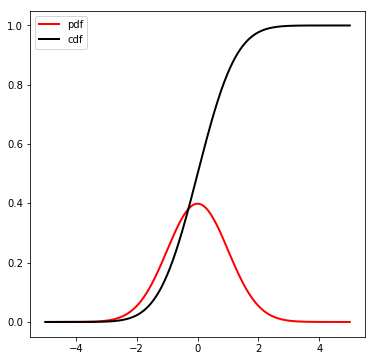

In [61]:
y_pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y_pdf, 'r', label='pdf', linewidth=2)
ax.plot(x, y_cdf, 'k', label='cdf', linewidth=2)
ax.legend(loc='best')
plt.show();

The binomial distribution tends to the normal distribution in the limit as $n\rightarrow \infty$:

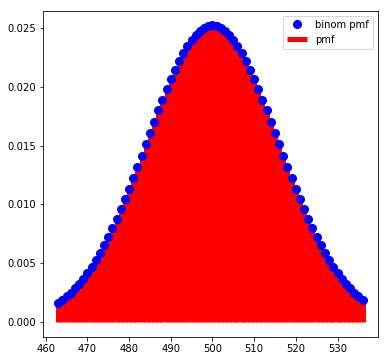

In [62]:
n = 1000
p = 0.5
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best')
plt.show()

### Exponential

The exponential distribution is like the continuous analog of the geometric distribution. It often answers the question: "How long will I have to wait before ... ?"

Think, for example, of the rate at which you receive spam emails. There is no regular pattern to the incoming of spam emails, but we can think about how what the probability is that you will have to wait a certain amount of time for the next to come in. And, in particular, the _longer_ you wait, the higher the probability will be that the next spam email will come soon.

Exponential distributions also describe the decay of radioactive materials. There is a high probability that you'll have to wait a very short time before a chunk of radioactive material decays, but there is a very small probability that you'll have to wait a long time.

$\Large f(x) = \lambda e^{-\lambda x}$, for $x \geq 0$.
Otherwise $\large f(x) = 0$.

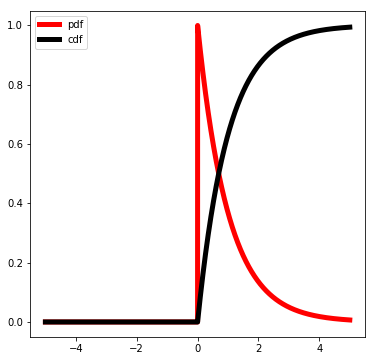

In [65]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = stats.expon.pdf(x, mu, sigma) # the exponential pdf
y_cdf = stats.expon.cdf(x, mu, sigma) # the exponential cdf


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y_pdf, 'r', label='pdf', linewidth=5)
ax.plot(x, y_cdf, 'k', label='cdf', linewidth=5)
ax.legend()
plt.show();

In [67]:
import seaborn as sns
%matplotlib inline

In [68]:
tips = sns.load_dataset('tips')

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


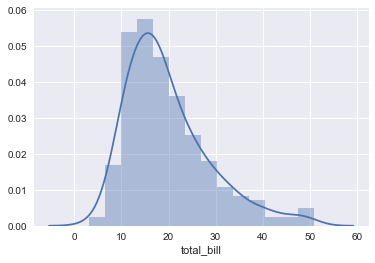

In [70]:
#univarite distribution
sns.distplot(tips['total_bill'])
#sns.distplot(tips['total_bill'], kde = False, bins =40)

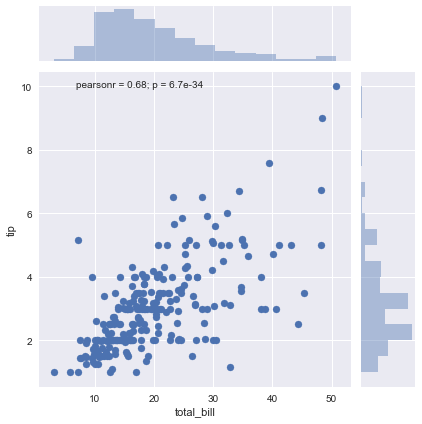

In [76]:
sns.jointplot(x='total_bill', y= 'tip' , data = tips)
#sns.jointplot(x='total_bill', y= 'tip' , data = tips, kind = 'hex or reg or kde')

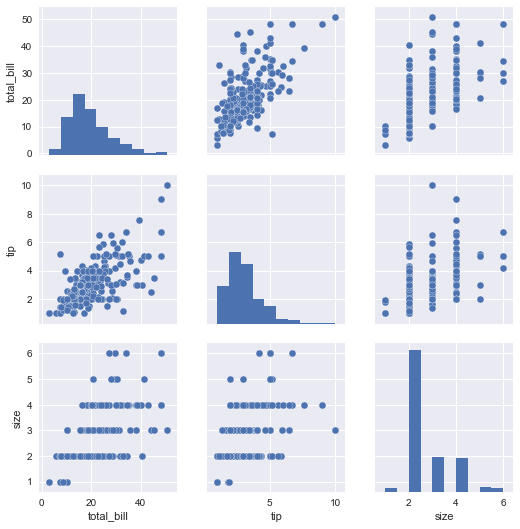

In [80]:
sns.pairplot(tips)
#sns.pairplot(tips, hue='sex', palette = 'coolwarm')

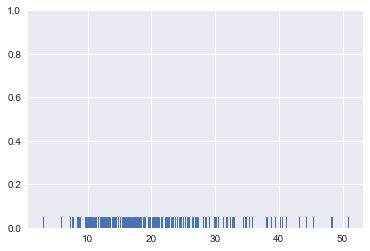

In [81]:
sns.rugplot(tips['total_bill'])

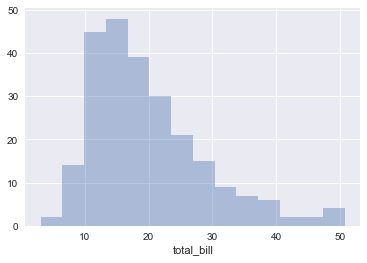

In [83]:
sns.distplot(tips['total_bill'], kde = False)